<a href="https://colab.research.google.com/github/ilmahamala/Predicting-Hotel-Booking-Cancellations/blob/main/Predicting_Hotel_Booking_Cancellations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import Library**

In [ ]:
# Base library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.preprocessing import StandardScaler, LabelEncoder
from mlxtend.preprocessing import minmax_scaling
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample

# Others
import warnings
warnings.filterwarnings("ignore")

### **Load Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import Dataset
df = pd.read_csv('/content/drive/MyDrive/2024_ITK_DS_Training/Hotel_Reservations.csv')
df.head().T

,0,1,2,3,4
Booking_ID,INN00001,INN00002,INN00003,INN00004,INN00005
no_of_adults,2.0,2.0,1.0,2.0,2.0
no_of_children,0.0,0.0,0.0,0.0,0.0
no_of_weekend_nights,1,2,2,0,1
no_of_week_nights,2,3,1,2,1
type_of_meal_plan,Meal Plan 1,Not Selected,Meal Plan 1,Meal Plan 1,Not Selected
required_car_parking_space,0,0,0,0,0
room_type_reserved,Room_Type 1,Room_Type 1,Room_Type 1,Room_Type 1,Room_Type 1
lead_time,224,5,1,211,48
arrival_year,2017,2018,2018,2018,2018


### **Data Understanding**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36272 non-null  float64
 2   no_of_children                        36270 non-null  float64
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
# Memeriksa jumlah unique values di setiap kolom
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique values"]).T

,unique values
Booking_ID,36275
no_of_adults,8
no_of_children,6
no_of_weekend_nights,8
no_of_week_nights,18
type_of_meal_plan,4
required_car_parking_space,2
room_type_reserved,7
lead_time,352
arrival_year,2


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36272.0,1.847182,0.568874,0.0,2.0,2.00,2.0,30.0
no_of_children,36270.0,0.105294,0.402674,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [ ]:
# mengecek nilai null

df.isnull().sum()

,0
Booking_ID,0
no_of_adults,3
no_of_children,5
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


#### **Exploratory Data Analysis (EDA)**

### **Data preparation**

In [ ]:
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2.0,0.0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2.0,0.0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1.0,0.0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2.0,0.0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2.0,0.0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3.0,0.0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2.0,0.0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2.0,0.0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2.0,0.0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [ ]:
# menghapus feature yang tidak diperlukan

df.dropna(subset=['Booking_ID'])

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2.0,0.0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2.0,0.0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1.0,0.0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2.0,0.0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2.0,0.0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3.0,0.0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2.0,0.0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2.0,0.0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2.0,0.0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [ ]:
df.isnull().sum()

,0
Booking_ID,0
no_of_adults,3
no_of_children,5
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


In [ ]:
# menghapus missing value
df.drop(inplace=True)

# mengecek missing value setelah dihandling
df.isnull().sum()

,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


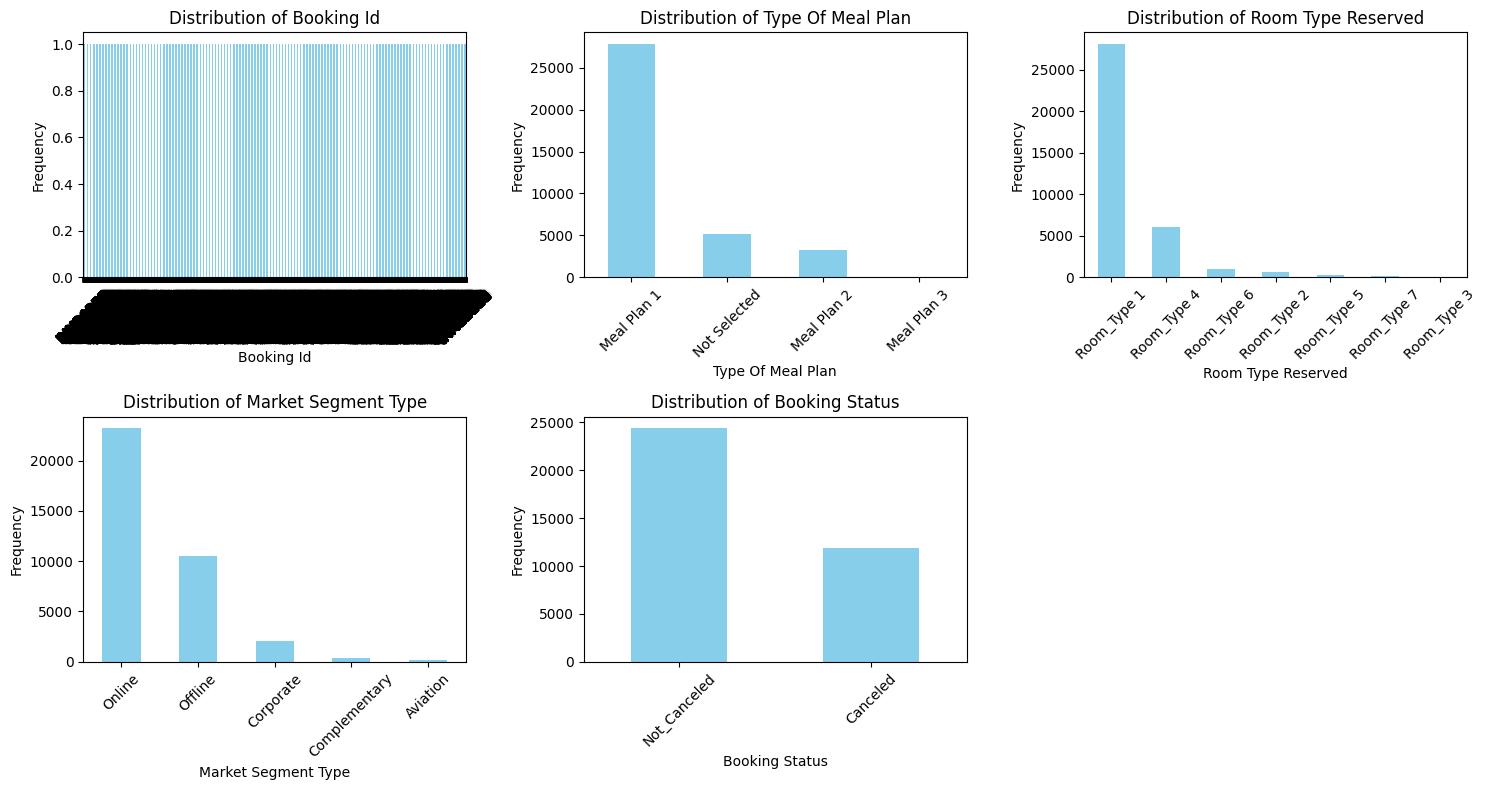

In [ ]:
import matplotlib.pyplot as plt

# Menyimpan kolom bertipe data 'object'
object_columns = df.select_dtypes(include=['object']).columns
num_columns = len(object_columns)

columns_per_row = 3
rows = (num_columns + columns_per_row - 1) // columns_per_row  # Hitung jumlah baris

# Membuat subplots
fig, axes = plt.subplots(rows, columns_per_row, figsize=(15, rows * 4))
axes = axes.flatten()  # Mengubah array 2D menjadi 1D untuk memudahkan iterasi

# Loop melalui setiap kolom bertipe object dan plot ke dalam subplot
for i, column in enumerate(object_columns):
    df[column].value_counts().plot(kind='bar', ax=axes[i], color='skyblue')
    axes[i].set_title(f"Distribution of {column.replace('_', ' ').title()}")
    axes[i].set_xlabel(column.replace('_', ' ').title())
    axes[i].set_ylabel("Frequency")
    axes[i].tick_params(axis='x', rotation=45)

# Menghilangkan axes kosong
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


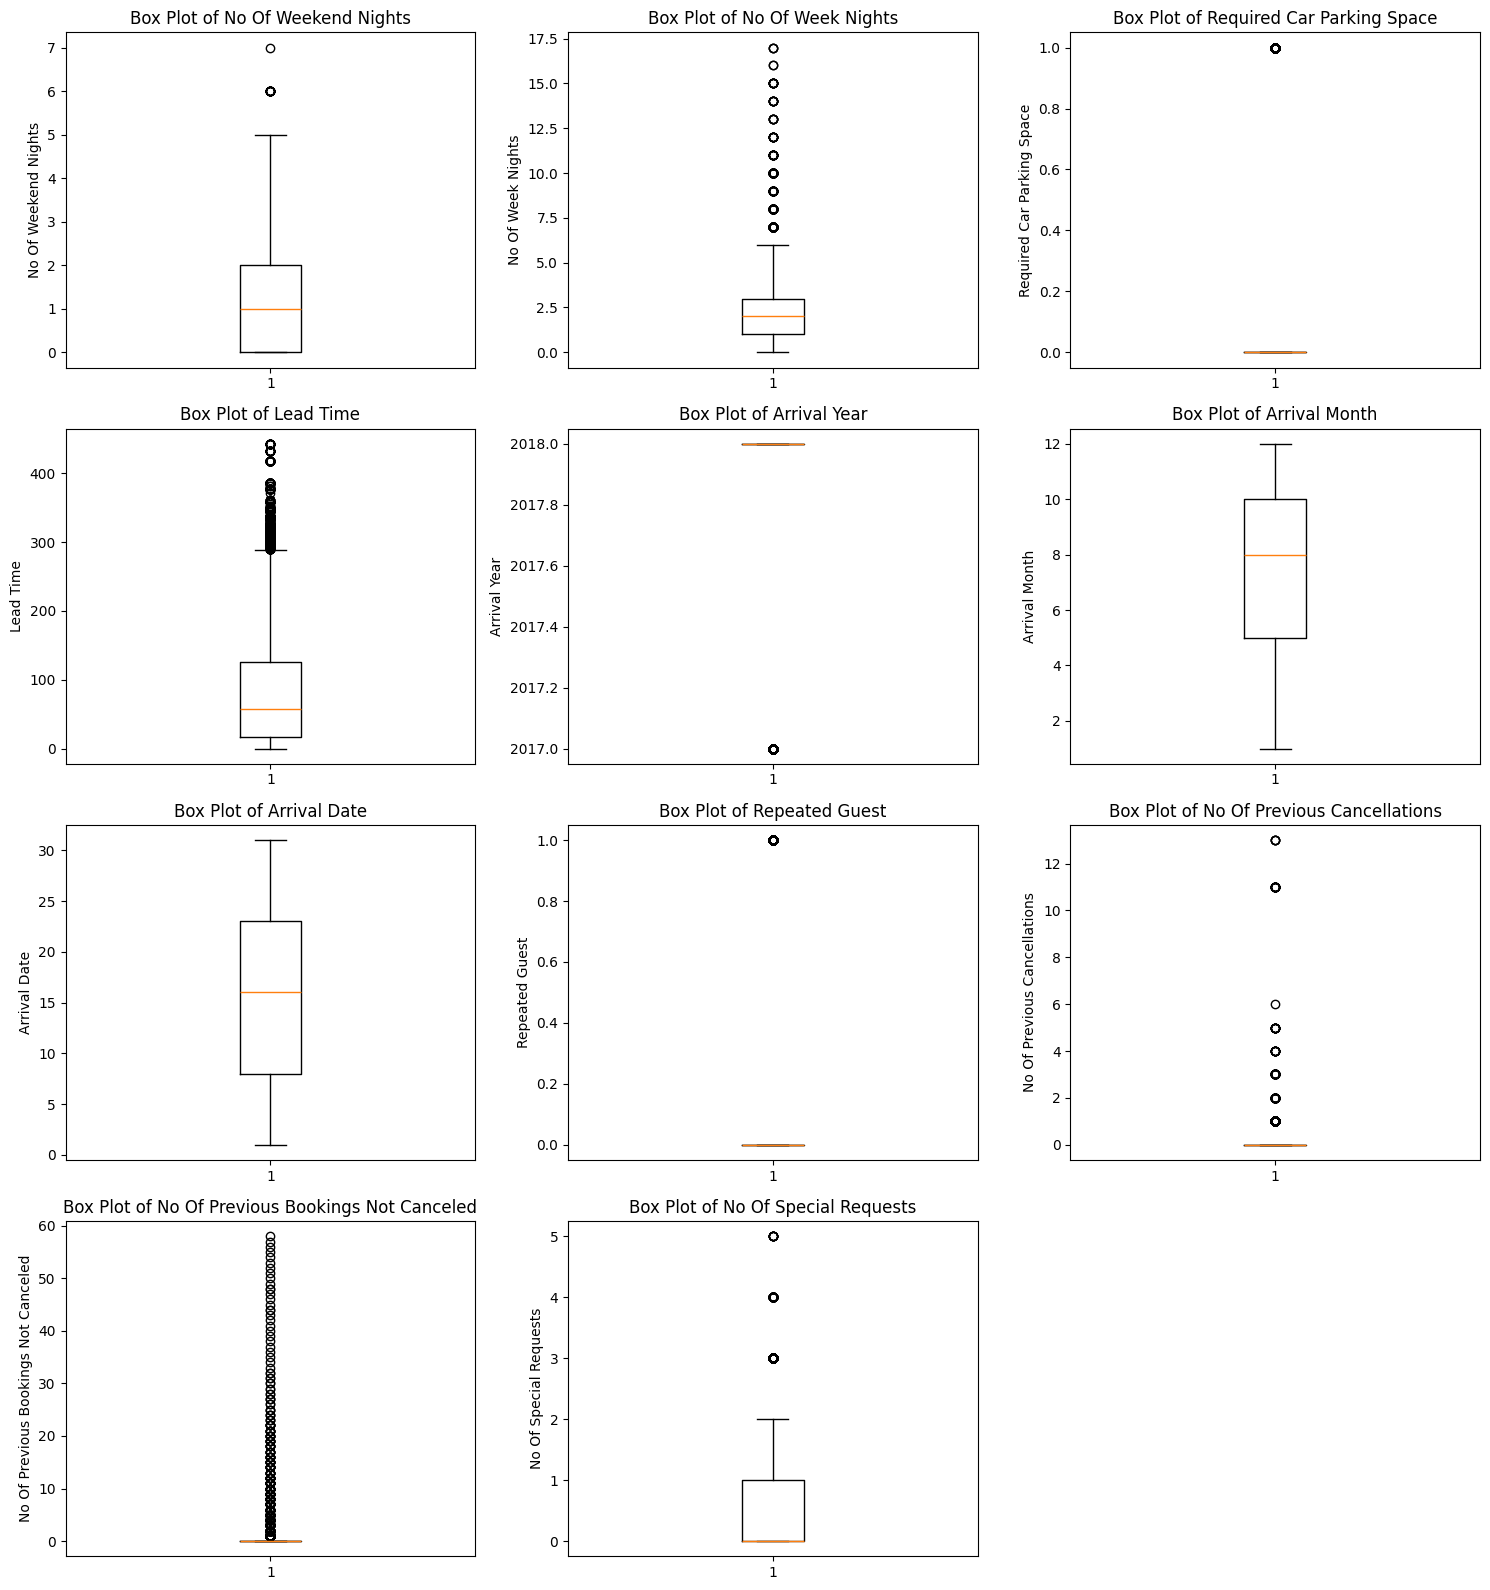

In [ ]:
import matplotlib.pyplot as plt

# Menyimpan kolom bertipe integer
int_columns = df.select_dtypes(include=['int']).columns
num_columns = len(int_columns)

# Tentukan jumlah kolom per baris (misalnya 3)
columns_per_row = 3
rows = (num_columns + columns_per_row - 1) // columns_per_row  # Hitung jumlah baris

# Membuat subplots untuk box plot
fig, axes = plt.subplots(rows, columns_per_row, figsize=(15, rows * 4))
axes = axes.flatten()  # Mengubah array 2D menjadi 1D untuk memudahkan iterasi

# Loop untuk setiap kolom integer dan membuat box plot
for i, column in enumerate(int_columns):
    axes[i].boxplot(df[column].dropna())  # Menghapus nilai null sebelum membuat box plot
    axes[i].set_title(f"Box Plot of {column.replace('_', ' ').title()}")
    axes[i].set_ylabel(column.replace('_', ' ').title())
    axes[i].set_xlabel("")

# Menghilangkan axes kosong jika ada
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

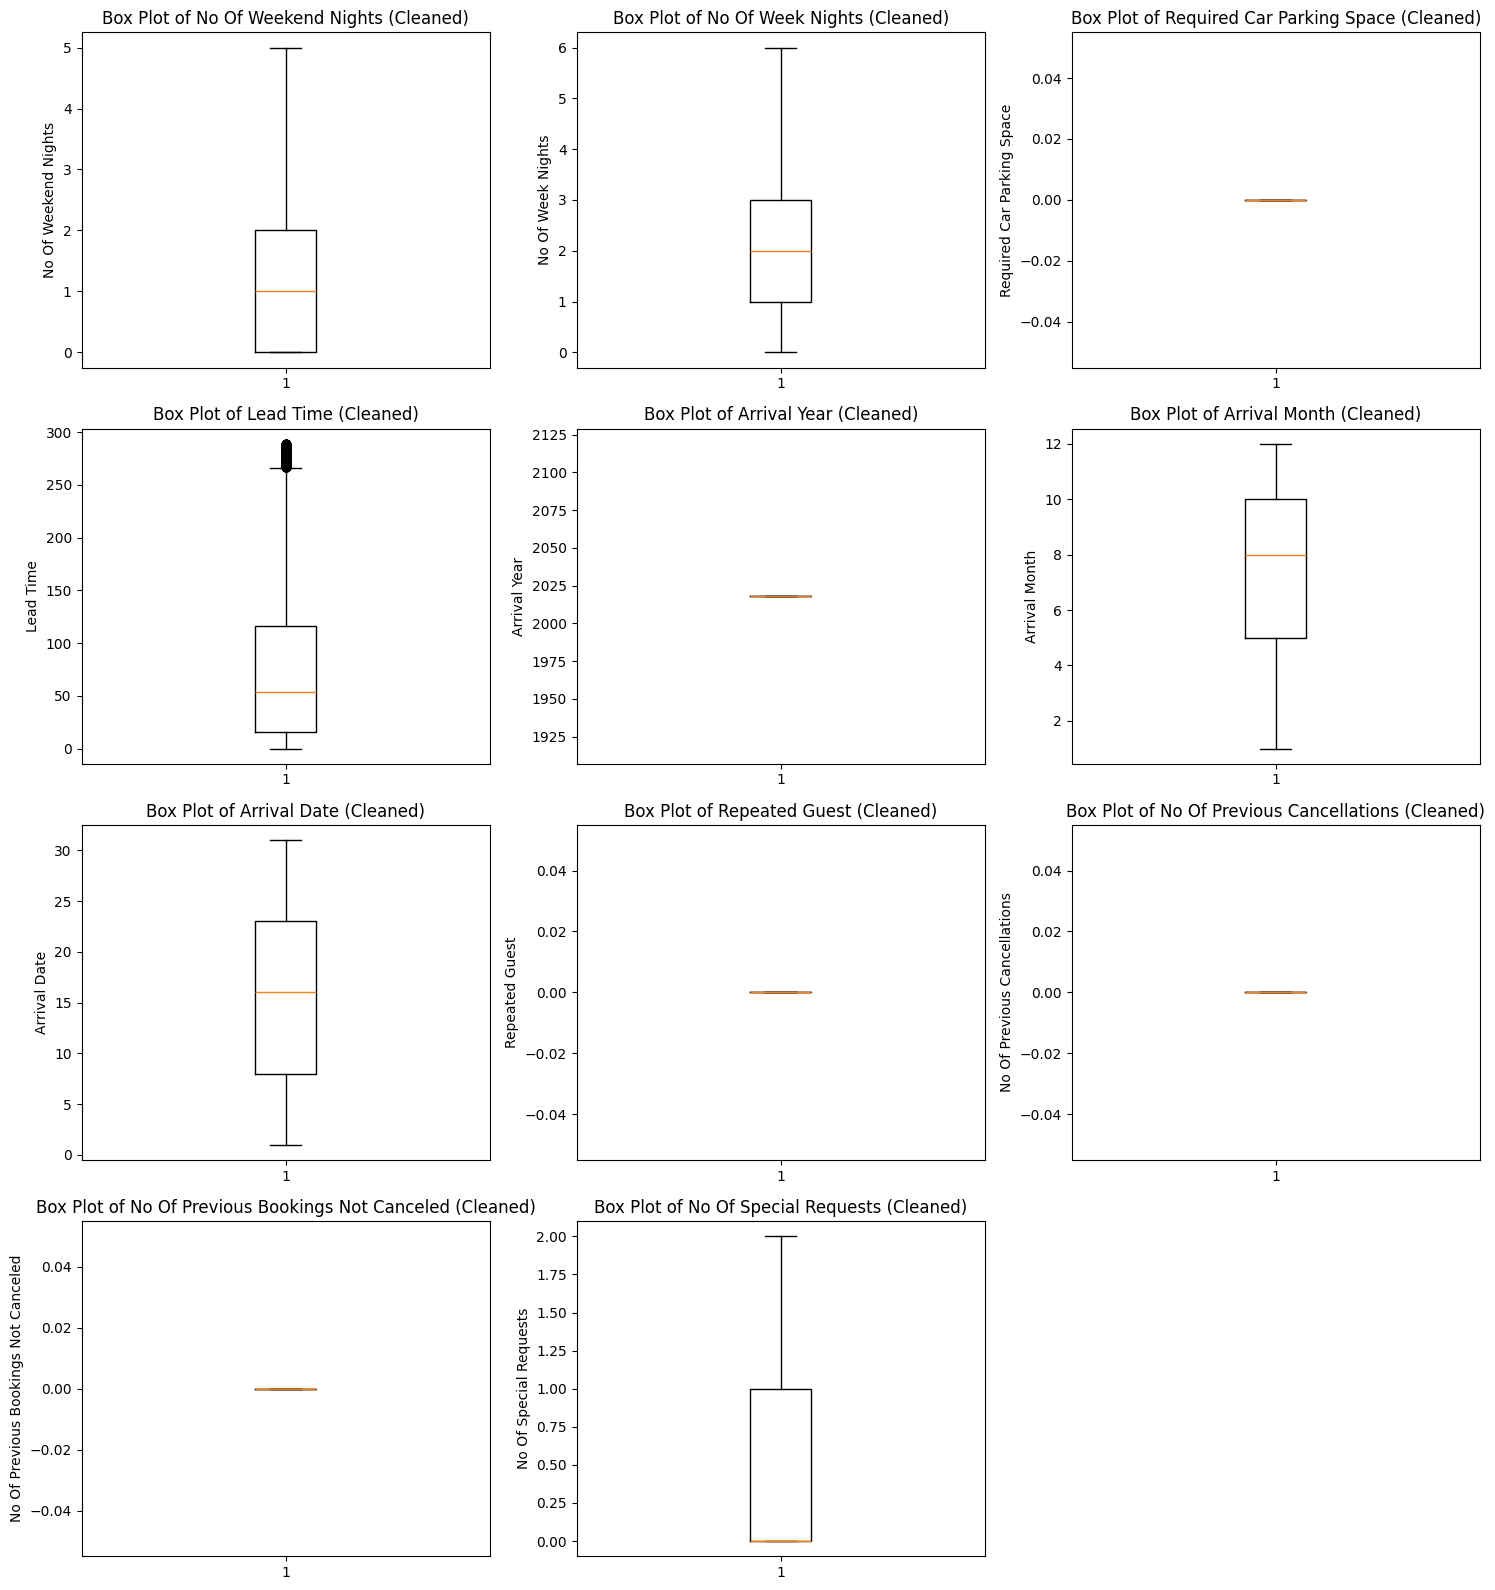

In [ ]:
# menghandling outlier
import numpy as np
import matplotlib.pyplot as plt

int_columns = df.select_dtypes(include=['int']).columns
num_columns = len(int_columns)

columns_per_row = 3
rows = (num_columns + columns_per_row - 1) // columns_per_row  # Hitung jumlah baris

# Membuat subplots untuk box plot
fig, axes = plt.subplots(rows, columns_per_row, figsize=(15, rows * 4))
axes = axes.flatten()  # Mengubah array 2D menjadi 1D untuk memudahkan iterasi

# Loop untuk setiap kolom integer, membuat box plot, dan menangani outlier
for i, column in enumerate(int_columns):
    # Menghitung kuartil
    Q1 = df[column].quantile(0.25)
    Q2 = df[column].quantile(0.50)
    Q3 = df[column].quantile(0.75)

    # Menghitung IQR
    IQR = Q3 - Q1

    # Menentukan batas untuk outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menghapus outlier
    cleaned_data = df[column][(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    # Membuat box plot untuk data yang telah dibersihkan
    axes[i].boxplot(cleaned_data.dropna())  # Menghapus nilai null sebelum membuat box plot
    axes[i].set_title(f"Box Plot of {column.replace('_', ' ').title()} (Cleaned)")
    axes[i].set_ylabel(column.replace('_', ' ').title())
    axes[i].set_xlabel("")

# Menghilangkan axes kosong jika ada
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
# melakukan encoding kepada feature yang bertipe data object

object_cols = df.select_dtypes(include=['object']).columns.tolist()

df_encoded = df.copy()

for col in object_cols:

    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
df_encoded

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2.0,0.0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0,1
1,1,2.0,0.0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68,1,1
2,2,1.0,0.0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00,0,0
3,3,2.0,0.0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.00,0,0
4,4,2.0,0.0,1,1,3,0,0,48,2018,4,11,4,0,0,0,94.50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,36258,3.0,0.0,2,6,0,0,3,85,2018,8,3,4,0,0,0,167.80,1,1
36271,36259,2.0,0.0,1,3,0,0,0,228,2018,10,17,4,0,0,0,90.95,2,0
36272,36260,2.0,0.0,2,6,0,0,0,148,2018,7,1,4,0,0,0,98.39,2,1
36273,36261,2.0,0.0,0,3,3,0,0,63,2018,4,21,4,0,0,0,94.50,0,0


***
Standar Scaler
***

In [ ]:
#numerical_features = df.select_dtypes(include=['number']).columns.tolist()
#df = minmax_scaling(df, columns=numerical_features)
#df

### **Modelling**

#### **Data Splitting**

In [ ]:
# memisahkan variabel independen dan dependen
X = df_encoded.drop("booking_status", axis=1)
y = df_encoded["booking_status"]

# Membagi data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### **Model Fitting**


Algoritma yang digunakan, diantaranya adalah:
1. XGBoost
2. Decision Tree
3. KNN
4. Logistic Regression

Algoritma classification tersebut digunakan karena cocok diterapkan pada data data biner

Confusion Matrix for XGBoost:


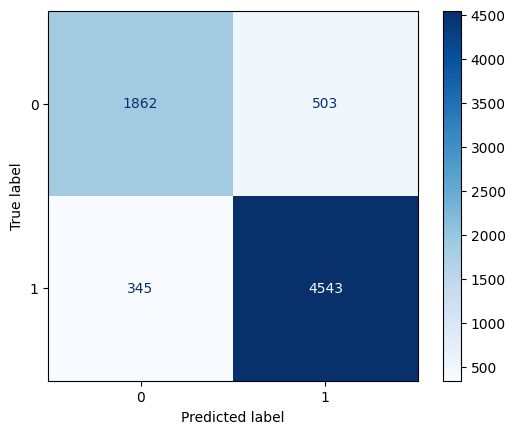

Confusion Matrix for Decision Tree:


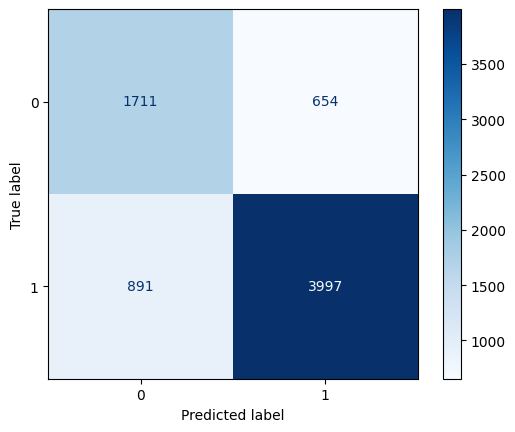

Confusion Matrix for KNN:


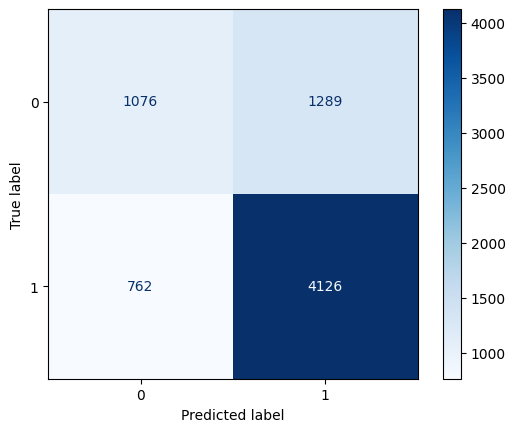

Confusion Matrix for Logistic Regression:


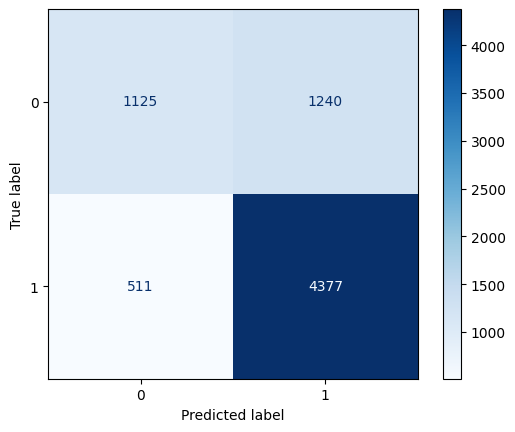

Hasil Model Fitting:


,Model Name,Accuracy,Precision,Recall,F1-Score
0,XGBoost,0.883083,0.900317,0.929419,0.914637
1,Decision Tree,0.786985,0.859385,0.817717,0.838033
2,KNN,0.717220,0.761958,0.844108,0.800932
3,Logistic Regression,0.758583,0.779242,0.895458,0.833317


In [ ]:
# Define models
models = {
    "XGBoost": XGBClassifier(objective='binary:logistic', random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=3),
    "KNN" : KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression" : LogisticRegression()
}

# Initialize DataFrame to store model performance metrics
df_model_fitting = pd.DataFrame(columns=["Model Name", "Accuracy", "Precision", "Recall", "F1-Score"])

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    # Append results to DataFrame
    df_model_fitting.loc[len(df_model_fitting)] = [name, accuracy, precision, recall, f1]

    # Display Confusion Matrix
    print(f"Confusion Matrix for {name}:")
    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap="Blues")
    plt.show()

# Display performance after feature selection
print('Hasil Model Fitting:')
display(df_model_fitting)

Insight
***

Setelah beberapa algoritma diatas diterapkan kedalam data 'heart_datapreprocessing', algoritma Logistic Regression memiliki akurasi tertinggi yaitu 85.96% kemudian disusul XGBoost yang memiliki akurasi sebesar 80.70%

#### **Experiment-1: Cross-Validation & Learning Curves**

Namun, akurasi model yang diperoleh dari satu split data (train-test split) tidak selalu mencerminkan performa model pada data, maka selanjutnya bisa dilakukan cross-validation yang membagi data menjadi beberapa bagian dan melatih model pada setiap bagian dengan data yang berbeda. Kemudian dibuat learning curves untuk mengetahui ukuran antara data training dan testing dan mengetahui model terbaik.

In [ ]:
# Cross-validation
results_df = pd.DataFrame(columns=["Model Name", "Score of Accuracy", "Mean of Accuracy", "Std of Accuracy"])

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)
    results_df.loc[len(results_df)] = [name, scores, np.mean(scores), np.std(scores)]

print('\n Setelah dilakukan cross-validation')
after_crossval = results_df.copy()
after_crossval

print('\n Sebelum dilakukan cross-validation')
df_model_fitting


 Setelah dilakukan cross-validation

 Sebelum dilakukan cross-validation


,Model Name,Accuracy,Precision,Recall,F1-Score
0,XGBoost,0.883083,0.900317,0.929419,0.914637
1,Decision Tree,0.786985,0.859385,0.817717,0.838033
2,KNN,0.717220,0.761958,0.844108,0.800932
3,Logistic Regression,0.758583,0.779242,0.895458,0.833317



Insight
***
1. Terdapat peningkatan akurasi pada algoritma XGBoost, decision tree, dan KNN
2. Terdapat penurunan akurasi pada algoritma logistic regression. Penurunan ini dapat terjadi overfitting maupun underfitting.

Selanjutnya dibuat learning curves yang menunjukkan hubungan antara jumlah data yang digunakan untuk melatih model dan akurasi model. Hal ini membantu untuk mengidentifikasi apakah model overfitting (terlalu pada detail kecil pada data training) atau underfitting (tidak belajar cukup banyak dari data training).


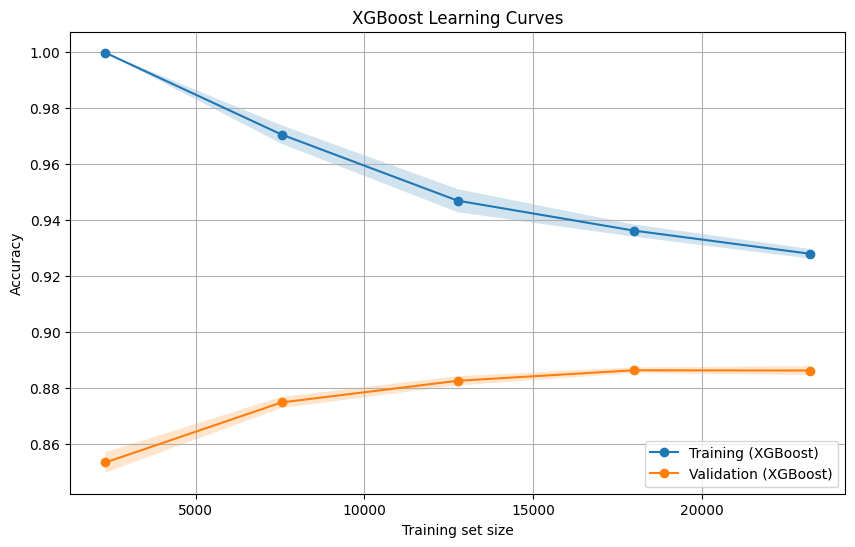

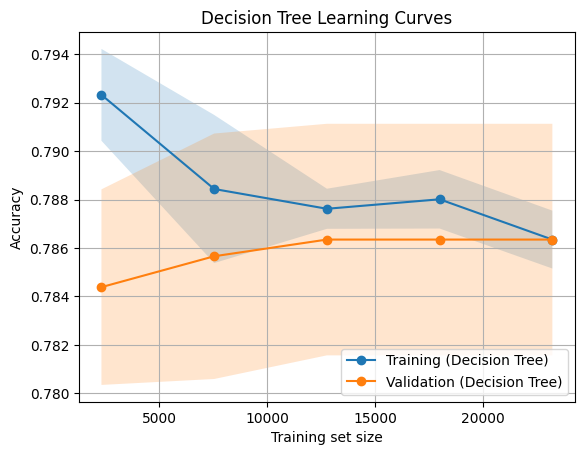

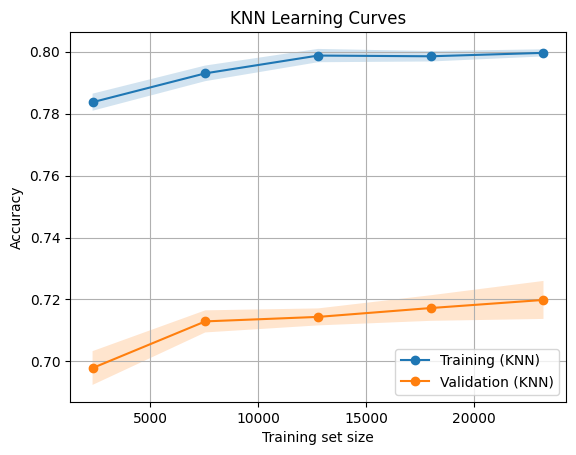

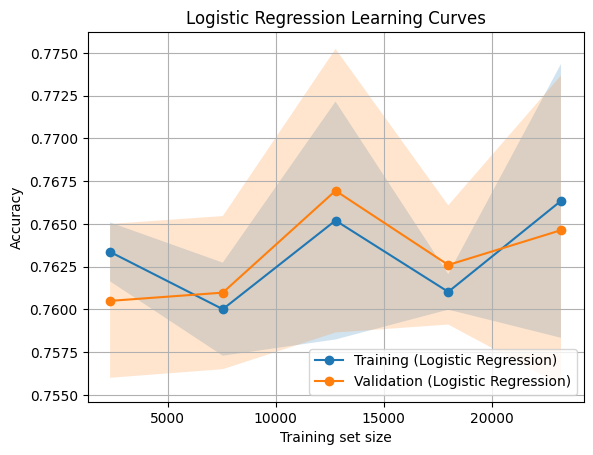

In [ ]:
plt.figure(figsize=(10, 6))

for i, (name, model) in enumerate(models.items()):
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5)

    plt.fill_between(train_sizes, train_scores.mean(axis=1) - train_scores.std(axis=1),
                     train_scores.mean(axis=1) + train_scores.std(axis=1), alpha=0.2)
    plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label=f"Training ({name})")

    plt.fill_between(train_sizes, test_scores.mean(axis=1) - test_scores.std(axis=1),
                     test_scores.mean(axis=1) + test_scores.std(axis=1), alpha=0.2)
    plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', label=f"Validation ({name})")

    plt.legend(loc="lower right")
    plt.xlabel("Training set size")
    plt.ylabel("Accuracy")
    plt.title(f'{name} Learning Curves')
    plt.grid(True)
    plt.show()

Insight
***
1. Learning curves XGBoost:
- Training menunjukkan peningkatan yang signifikan dari sekitar 0.94 hingga 1.00. Hal ini menunjukkan bahwa model mungkin mengalami overfitting, di mana model terlalu fokus pada data training
- Testing accuracy menunjukkan peningkatan yang positif dari sekitar 0.72 hingga 0.82. Hal ini menunjukkan bahwa model mampu belajar dan menghasilkan prediksi yang akurat pada data baru

2. Learning curves decision tree:
- Training loss menunjukkan penurunan yang signifikan dari sekitar 0.96 hingga 0.87. Hal ini menunjukkan bahwa model belajar dengan baik dan mampu meminimalkan error pada data training
- Testing accuracy menunjukkan peningkatan yang positif dari sekitar 0.72 hingga 0.78. Hal ini menunjukkan bahwa model mampu menggeneralisasikan pengetahuan yang diperoleh dari data training ke data testing


3. Learning curves KNN:
- Training loss menunjukkan perubahan yang kecil, yaitu dari sekitar 0.78 hingga 0.77. Hal ini menunjukkan bahwa model mungkin telah mencapai titik optimal dalam pembelajarannya.
- Testing accuracy menunjukkan perubahan yang kecil, yaitu dari sekitar 0.60 hingga 0.64. Hal ini menunjukkan bahwa model belum mampu menggeneralisasikan pengetahuan dengan baik ke data baru yang belum pernah dilihat sebelumnya
- Learning curves ini menunjukkan bahwa model belum optimal

4. Learning curves logistic regression:
- pada awal, training secara signifikan jauh lebih tinggi daripada testing yang menunjukkan bahwa model terlalu menghafal data training
- training menunjukkan penurunan (training loss) dari sekitar 0,95 hingga 0,85. Hal ini menunjukkan bahwa model belajar dengan baik dan mampu meminimalkan error pada data training
- testing menunjukkan kenaikan dari sekitar 0,66 hingga 0,82. Hal ini menunjukkan bahwa model mampu menggeneralisasikan pengetahuan yang diperoleh dari data training ke data testing dan tidak menunjukkan overfitting

#### **Experiment-2: Hyperparameter Tuning**

Selanjutnya dilakukan hyperparameter tuning yang mencari nilai optimal dari hyperparameter yang dapat meningkatkan performa model. Metode yang digunakan pada hyperparameter tuning ini menggunakan random search yang memilih nilai hyperparameter secara acak dan memilih yang menghasilkan performa terbaik.

In [ ]:
# parameter distribution

# Decision Tree
param_dist_dt = {
    'max_depth': [3, 5, 10, 14],
    'min_samples_split': [2, 5, 10, 3, 4, 8],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [1, 2, 4, 8]
}

# XGBoost
param_dist_xgb = {
    "reg_alpha":[1e-5, 1e-2, 0.1, 100],
    "max_depth" : [3, 5, 7, 9],
    "C": np.logspace(-4, 0.0001, 4, 5),
    "kernel": ["linear", "rbf"],
    "gamma": np.logspace(-3, 1, 3, 5),
    "max_depth": [3, 5, 10],
    "learning_rate": [0.1, 0.01],
    "n_estimators": [100, 200]
}

# KNN
param_dist_knn = {
    "n_neighbors": np.arange(1, 21),
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree"]
}

# Logistic Regression
param_dist_lr = {
    "C": np.logspace(-4, 4, 20),
    "penalty": ["l1", "l2"],
    "solver": ["lbfgs", "newton-cg"],
    "max_iter": [100, 200, 300],
    "tol": [1e-3, 1e-4, 1e-5],
}

In [ ]:
# RandomizedSearchCV - Decision Tree
dt_model = models["Decision Tree"]
random_search_dt = RandomizedSearchCV(estimator=dt_model, param_distributions=param_dist_dt, n_iter=100, cv=5, random_state=0)
random_search_dt.fit(X, y)

print("Best parameters for Decision Tree:", random_search_dt.best_params_)
print("Best accuracy score for Decision Tree:", random_search_dt.best_score_)

Best parameters for Decision Tree: {'min_samples_split': 8, 'min_samples_leaf': 8, 'max_depth': 10, 'criterion': 'gini'}
Best accuracy score for Decision Tree: 0.8643245745203556


In [ ]:
# RandomizedSearchCV - XGBoost
xgb_model = models["XGBoost"]
random_search_xgb = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist_xgb, n_iter=100, cv=5, random_state=0)
random_search_xgb.fit(X, y)

print("Best parameters for XGBoost:", random_search_xgb.best_params_)
print("Best accuracy score for XGBoost:", random_search_xgb.best_score_)

Best parameters for XGBoost: {'reg_alpha': 0.1, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.01, 'kernel': 'rbf', 'gamma': 0.1, 'C': 0.04642301398519828}
Best accuracy score for XGBoost: 0.8693164834544757


In [ ]:
# RandomizedSearchCV - KNN
knn_model = models["KNN"]
random_search_knn = RandomizedSearchCV(estimator=knn_model, param_distributions=param_dist_knn, n_iter=100, cv=5, random_state=0)
random_search_knn.fit(X, y)

print("Best parameters for KNN:", random_search_knn.best_params_)
print("Best accuracy score for KNN:", random_search_knn.best_score_)

Best parameters for KNN: {'weights': 'uniform', 'n_neighbors': 19, 'algorithm': 'ball_tree'}
Best accuracy score for KNN: 0.4969757839900244


In [ ]:
# RandomizedSearchCV - Logistic Regression
lr_model = models["Logistic Regression"]
random_search_lr = RandomizedSearchCV(estimator=lr_model, param_distributions=param_dist_lr, n_iter=100, cv=5, random_state=0)
random_search_lr.fit(X, y)

print("Best parameters for Logistic Regression:", random_search_lr.best_params_)
print("Best accuracy score for Logistic Regression:", random_search_lr.best_score_)

Best parameters for Logistic Regression: {'tol': 1e-05, 'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 300, 'C': 29.763514416313132}
Best accuracy score for Logistic Regression: 0.8040149238510507


In [ ]:
# Remodeling hyperparameter tuning
dt_model_tuned = DecisionTreeClassifier(**random_search_dt.best_params_)
knn_model_tuned = KNeighborsClassifier(**random_search_knn.best_params_)
xgb_model_tuned = XGBClassifier(**random_search_xgb.best_params_)
lr_model_tuned = LogisticRegression(**random_search_lr.best_params_)

evaluation_results_tuned = {'Model Name': [], 'Score of Accuracy': [], 'Mean of Accuracy': [], 'Std of Accuracy': []}

for model_name, model in {"XGBoost" : xgb_model_tuned, "Decision Tree" : dt_model_tuned, "KNN" : knn_model_tuned, "Logistic Regression" : lr_model_tuned}.items():
    scores = cross_val_score(model, X, y, cv=5)

    evaluation_results_tuned['Model Name'].append(model_name)
    evaluation_results_tuned['Score of Accuracy'].append(scores)
    evaluation_results_tuned['Mean of Accuracy'].append(np.mean(scores))
    evaluation_results_tuned['Std of Accuracy'].append(np.std(scores))

evaluation_df_tuned = pd.DataFrame(evaluation_results_tuned)

after_tuning = pd.DataFrame(data=evaluation_results_tuned)
print('Setelah dilakukan Tuning:')
after_tuning

print('\nSebelum dilakukan Tuning:')
after_crossval

Setelah dilakukan Tuning:

Sebelum dilakukan Tuning:


,Model Name,Score of Accuracy,Mean of Accuracy,Std of Accuracy
0,XGBoost,"[0.8888314374353671, 0.8872802481902792, 0.884...",0.886246,0.001583
1,Decision Tree,"[0.7911065149948294, 0.786625301620131, 0.7919...",0.786350,0.004782
2,KNN,"[0.7226818338503964, 0.7281971733884868, 0.709...",0.719855,0.006134
3,Logistic Regression,"[0.7611168562564633, 0.781282316442606, 0.7604...",0.764633,0.009054


Insight
***
1. Semua model mengalami peningkatan
2. Peningkatan akurasi menunjukkan proses hyperparamter tuning ini berhasil menemukan kombinasi hyperparameter yang lebih baik
3. Peningkatan akurasi yang kecil menunjukkan bahwa nilai hyperparameter yang optimal belum ditemukan
4. Dengan hyperparameter tuning didapat beberapa parameter terbaik

#### **Experiment-3: Bootstrapping**

In [ ]:
results = {}

for model_name, model in models.items():
    predictions = []
    n_estimators = 100

    for _ in range(n_estimators):
        X_boot, y_boot = resample(X_train, y_train, random_state=np.random.randint(100))
        model.fit(X_boot, y_boot)
        y_pred = model.predict(X_test)
        predictions.append(y_pred)

    final_predictions = np.mean(predictions, axis=0)

    # Threshold prediksi untuk nilai biner
    threshold = 0.5
    final_predictions_binary = [1 if pred > threshold else 0 for pred in final_predictions]
    accuracy = accuracy_score(y_test, final_predictions_binary)
    results[model_name] = {"accuracy": accuracy, "predictions": final_predictions_binary}

evaluation_results = {'Model Name': [], 'Score of Accuracy': []}

for model_name, result in results.items():
    # Store mean accuracy
    evaluation_results['Model Name'].append(model_name)
    evaluation_results['Score of Accuracy'].append(result['accuracy'])

after_bootstrapping = pd.DataFrame(data=evaluation_results)
print('Setelah dilakukan bootstrapping:')
after_bootstrapping

print('\nSebelum dilakukan bootstrapping:')
after_tuning

Setelah dilakukan bootstrapping:

Sebelum dilakukan bootstrapping:


,Model Name,Score of Accuracy,Mean of Accuracy,Std of Accuracy
0,XGBoost,"[0.8698469598786709, 0.8370329518819799, 0.877...",0.869316,0.016718
1,Decision Tree,"[0.8677788501309803, 0.8584034192747828, 0.864...",0.864187,0.003984
2,KNN,"[0.6725492899489867, 0.49165862401764787, 0.49...",0.496976,0.108612
3,Logistic Regression,"[0.8192472080518406, 0.8020129601544188, 0.797...",0.804015,0.007759


Insight
***
1. terdapat peningkatan akurasi pada algoritma XGBoost, decision tree, dan logistic regression
2. terdapat penurunan akurasi pada algoritma KNN karena algoritma ini sensitif terhadap noise, sedangkan bootsrapping dapat memperkuat noise

#### **Metric Evaluation - ROC Curve**

ROC curve digunakan sebagai pengukur performance untuk classification problem dalam menentukan threshold model terbaik. Default pada threshold umumnya adalah 0.5

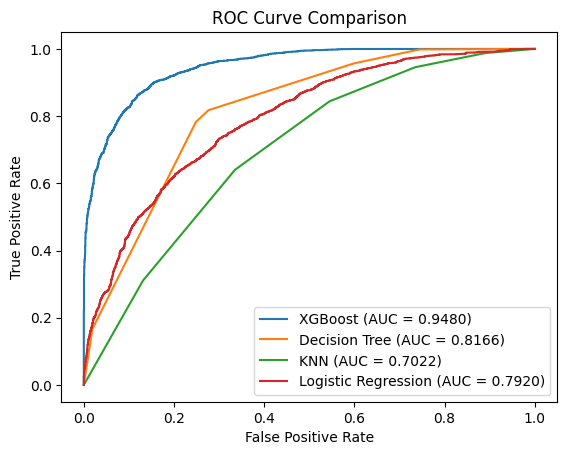

In [ ]:
def plot_roc_curve(model_name, model, X_test, y_test):
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # mendefinisikan metrics
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.4f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Comparison')
    plt.legend()

for model_name, model in models.items():
    model.fit(X_train, y_train)
    plot_roc_curve(model_name, model, X_test, y_test)

plt.show()

Insight
***
1. True positive rate memiliki rumus True Positive/(True Positif + False Negative). jika hasilnya semakin mendekati 1 maka data terklasifikasi dengan benar

2. False negative rate memiliki rumus False Positive/(False Positive + True Negative). jika hasilnya semakin mendekati 1 maka data tidak terklasifikasi dengan benar

3. ROC juga memiliki fungsi untuk menentukan threshold terbaik. Semakin tinggi True Positive Rate dan semakin kecil False Positive Rate maka thresholdnya semakin bagus. Dapat disimpulkan perkiraan nilai threshold terbaik pada setiap model, diantaranya adalah:
- XGBoost: 0.4
- Decision tree: 0.65
- KNN: 0.4
- Logistic regression: 0.9

4. Nilai AUC (Area Under the Curve) yang merupakan luas area dibawah curve ROC memudahkan kita dalam membandingkan beberapa model. Model yang baik adalah model yang memiliki AUC paling besar, karena memiliki titik TP yang lebih tinggi atau titik FP yang lebih rendah. Dapat disimpulkan bahwa model terbaik adalah XGBoost (0.8722) disusul dengan linear regression (0.8561) dan decision tree (0.8381)
